5. We now want to build a social graph where each node corresponds to a hashtag and an edge between hashtag A and hashtag B indicates that there is at least one tweet which contains both hashtag A and hashtag B. Implement a python program that allows you to identify hashtags from Tweet content message and generate the above social network graph.

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

#deleted #militaryukraine because it has no other connection
hashtags = ['ukrainewar', 'war', 'army', 'military', 'kiev', 'ua', 'specialforces', 'donbass', 'donbasswar', 'airsoft', 'nomockal', 'warukraine', 'tactics', 'azovsea', 'militarystile', 'azov', 'russia', 'donetsk', 'soldiers', 'ukrainenews', 'odessa', 'ukrainianarmy', 'lviv', 'victory', 'nato', 'kyiv', 'militaryukraine', 'news']
tweets = pd.read_csv('tweets_2022-05-08.csv')

dictOfhashtags = { i : [] for i in hashtags }
list_of_matches = []

for index, row in tweets.iterrows():
    list_of_matches.append(set([hashtag_tweet.lower() for hashtag_tweet in ast.literal_eval(row.loc['hashtags'])]).intersection(hashtags))
        


In [3]:
print(list_of_matches)

[{'russia'}, {'tactics'}, {'military'}, {'news'}, {'news'}, {'kyiv'}, {'news'}, {'war'}, {'news'}, {'news'}, {'russia'}, {'nato'}, {'kyiv'}, {'news'}, {'russia'}, {'ukrainewar'}, {'russia'}, {'russia'}, {'news'}, {'war'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'russia'}, {'news'}, {'news'}, {'news'}, {'russia'}, {'news'}, {'news'}, {'news'}, {'army'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'russia', 'nato'}, {'nato'}, {'russia'}, {'russia'}, {'news'}, {'military'}, {'news'}, {'news'}, {'war'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'army'}, {'news'}, {'news'}, {'russia'}, {'kiev'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'news'}, {'nato'}, {'azov'}, {'ukrainewar'}, {'nato'}, {'russia'}, {'news'}, {'news'}, {'russia'}, {'azov'}, {'war'}, {'russia'}, {'army'}, {'russia'}, {'russia'}, {'russia'}, {'war'}, {'war'}, {'russia'}, {'nato'}, {'war'}, {'military'}, set(), {'russia'}, {'nato'}, {'odessa'}, {'ta

In [4]:
list_of_matches_with_more_than_one = []
for element in list_of_matches:
    if len(element) >= 2:
        list_of_matches_with_more_than_one.append(element)

In [5]:
print(list_of_matches_with_more_than_one)

[{'russia', 'nato'}, {'ukrainewar', 'kyiv'}, {'russia', 'ukrainewar'}, {'russia', 'azov'}, {'russia', 'nato', 'odessa', 'azov'}, {'russia', 'azov'}, {'russia', 'news', 'ukrainewar'}, {'russia', 'news', 'nato', 'ukrainewar'}, {'russia', 'news'}, {'russia', 'ukrainewar'}, {'russia', 'azov'}, {'russia', 'nato'}, {'russia', 'war'}, {'kiev', 'kyiv'}, {'russia', 'azov'}, {'russia', 'nato'}, {'russia', 'donetsk'}, {'russia', 'kiev', 'ukrainewar', 'odessa'}, {'azov', 'donbass'}, {'russia', 'kiev'}, {'russia', 'war'}, {'war', 'ukrainewar'}, {'kiev', 'kyiv'}, {'russia', 'ukrainewar'}, {'kiev', 'ukrainewar', 'kyiv', 'odessa'}, {'ukrainewar', 'kyiv'}, {'war', 'azov'}, {'russia', 'odessa', 'donbass'}, {'russia', 'military'}, {'russia', 'ukrainewar'}, {'russia', 'ukrainewar'}, {'russia', 'kyiv'}, {'russia', 'news', 'nato'}, {'russia', 'ukrainewar'}, {'russia', 'news'}, {'russia', 'news'}, {'russia', 'donetsk'}, {'russia', 'nato'}, {'russia', 'news', 'kyiv'}, {'news', 'ukrainewar', 'ukrainianarmy', '

In [6]:
import itertools

combis = []

for element in list_of_matches_with_more_than_one:
    combis.append(list(itertools.combinations(element, 2)))

print(combis)

[[('russia', 'nato')], [('ukrainewar', 'kyiv')], [('russia', 'ukrainewar')], [('russia', 'azov')], [('russia', 'nato'), ('russia', 'odessa'), ('russia', 'azov'), ('nato', 'odessa'), ('nato', 'azov'), ('odessa', 'azov')], [('russia', 'azov')], [('russia', 'news'), ('russia', 'ukrainewar'), ('news', 'ukrainewar')], [('russia', 'news'), ('russia', 'nato'), ('russia', 'ukrainewar'), ('news', 'nato'), ('news', 'ukrainewar'), ('nato', 'ukrainewar')], [('russia', 'news')], [('russia', 'ukrainewar')], [('russia', 'azov')], [('russia', 'nato')], [('russia', 'war')], [('kiev', 'kyiv')], [('russia', 'azov')], [('russia', 'nato')], [('russia', 'donetsk')], [('russia', 'kiev'), ('russia', 'ukrainewar'), ('russia', 'odessa'), ('kiev', 'ukrainewar'), ('kiev', 'odessa'), ('ukrainewar', 'odessa')], [('azov', 'donbass')], [('russia', 'kiev')], [('russia', 'war')], [('war', 'ukrainewar')], [('kiev', 'kyiv')], [('russia', 'ukrainewar')], [('kiev', 'ukrainewar'), ('kiev', 'kyiv'), ('kiev', 'odessa'), ('ukr

In [7]:
flattened = [val for sublist in combis for val in sublist]
print(flattened)

[('russia', 'nato'), ('ukrainewar', 'kyiv'), ('russia', 'ukrainewar'), ('russia', 'azov'), ('russia', 'nato'), ('russia', 'odessa'), ('russia', 'azov'), ('nato', 'odessa'), ('nato', 'azov'), ('odessa', 'azov'), ('russia', 'azov'), ('russia', 'news'), ('russia', 'ukrainewar'), ('news', 'ukrainewar'), ('russia', 'news'), ('russia', 'nato'), ('russia', 'ukrainewar'), ('news', 'nato'), ('news', 'ukrainewar'), ('nato', 'ukrainewar'), ('russia', 'news'), ('russia', 'ukrainewar'), ('russia', 'azov'), ('russia', 'nato'), ('russia', 'war'), ('kiev', 'kyiv'), ('russia', 'azov'), ('russia', 'nato'), ('russia', 'donetsk'), ('russia', 'kiev'), ('russia', 'ukrainewar'), ('russia', 'odessa'), ('kiev', 'ukrainewar'), ('kiev', 'odessa'), ('ukrainewar', 'odessa'), ('azov', 'donbass'), ('russia', 'kiev'), ('russia', 'war'), ('war', 'ukrainewar'), ('kiev', 'kyiv'), ('russia', 'ukrainewar'), ('kiev', 'ukrainewar'), ('kiev', 'kyiv'), ('kiev', 'odessa'), ('ukrainewar', 'kyiv'), ('ukrainewar', 'odessa'), ('ky

In [8]:
edges = []
for l in flattened:
    edge = sorted ((l[0],l[1]))
    edge = tuple(edge)
    if edge not in edges:
        edges.append(edge)

print(edges)

[('nato', 'russia'), ('kyiv', 'ukrainewar'), ('russia', 'ukrainewar'), ('azov', 'russia'), ('odessa', 'russia'), ('nato', 'odessa'), ('azov', 'nato'), ('azov', 'odessa'), ('news', 'russia'), ('news', 'ukrainewar'), ('nato', 'news'), ('nato', 'ukrainewar'), ('russia', 'war'), ('kiev', 'kyiv'), ('donetsk', 'russia'), ('kiev', 'russia'), ('kiev', 'ukrainewar'), ('kiev', 'odessa'), ('odessa', 'ukrainewar'), ('azov', 'donbass'), ('ukrainewar', 'war'), ('kyiv', 'odessa'), ('azov', 'war'), ('donbass', 'russia'), ('donbass', 'odessa'), ('military', 'russia'), ('kyiv', 'russia'), ('kyiv', 'news'), ('news', 'ukrainianarmy'), ('news', 'warukraine'), ('ukrainewar', 'ukrainianarmy'), ('ukrainewar', 'warukraine'), ('ukrainianarmy', 'warukraine'), ('military', 'war'), ('azov', 'kiev'), ('news', 'war'), ('russia', 'ukrainenews'), ('news', 'ukrainenews'), ('ukrainenews', 'ukrainewar'), ('donbass', 'kiev'), ('nato', 'war'), ('kyiv', 'war'), ('russia', 'ukrainianarmy'), ('ukrainianarmy', 'war'), ('kiev',

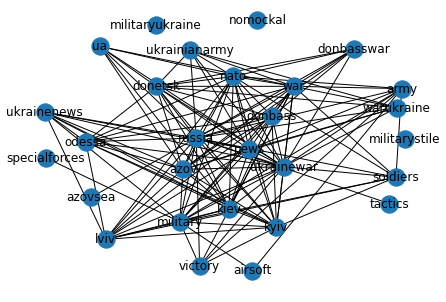

In [10]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(hashtags)
G.add_edges_from(edges)

pos = nx.spring_layout(G, k=2.5, iterations=50)
nx.draw(G, pos, with_labels = True)

Task 6: main global properties

In [13]:
import statistics

print(f'Nodes: {G.number_of_nodes()}')
print(f'Edges: {G.number_of_edges()}')
print(f'Degree Centrality: {nx.degree_centrality(G)}')
average_degree_centrality = statistics.mean([x for x in nx.degree_centrality(G).values()])
print(f'Average degree centrality: {average_degree_centrality}')
#print(f'Diameter: {nx.diameter(G0)}')
print(f'Clustering Coefficient: {nx.clustering(G)}')
print(f'Average Clustering Coefficient: {nx.average_clustering(G)}')

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

print(f'Nodes of largest component: {G0.number_of_nodes()}')

data = [['Nodes', G.number_of_nodes()],
        ['Edges', G.number_of_edges()],
        ['Average degree centrality', statistics.mean([x for x in nx.degree_centrality(G).values()])],
        ['Diameter', nx.diameter(G0)],
        ['Average Clustering Coefficient', nx.average_clustering(G)],
        ['Size largest component', G0.number_of_nodes()]]

Nodes: 28
Edges: 133
Degree Centrality: {'ukrainewar': 0.7407407407407407, 'war': 0.6666666666666666, 'army': 0.3333333333333333, 'military': 0.5925925925925926, 'kiev': 0.5185185185185185, 'ua': 0.25925925925925924, 'specialforces': 0.037037037037037035, 'donbass': 0.4444444444444444, 'donbasswar': 0.25925925925925924, 'airsoft': 0.07407407407407407, 'nomockal': 0.0, 'warukraine': 0.25925925925925924, 'tactics': 0.037037037037037035, 'azovsea': 0.037037037037037035, 'militarystile': 0.0, 'azov': 0.5925925925925926, 'russia': 0.8148148148148148, 'donetsk': 0.5185185185185185, 'soldiers': 0.2962962962962963, 'ukrainenews': 0.3333333333333333, 'odessa': 0.4074074074074074, 'ukrainianarmy': 0.25925925925925924, 'lviv': 0.4444444444444444, 'victory': 0.2222222222222222, 'nato': 0.6296296296296295, 'kyiv': 0.5555555555555556, 'militaryukraine': 0.0, 'news': 0.5185185185185185}
Average degree centrality: 0.35185185185185186
Clustering Coefficient: {'ukrainewar': 0.5684210526315789, 'war': 0.

In [15]:
from tabulate import tabulate

print(tabulate(data, headers=['Property', 'Value'], tablefmt='fancy_grid'))

╒════════════════════════════════╤════════════╕
│ Property                       │      Value │
╞════════════════════════════════╪════════════╡
│ Nodes                          │  28        │
├────────────────────────────────┼────────────┤
│ Edges                          │ 133        │
├────────────────────────────────┼────────────┤
│ Average degree centrality      │   0.351852 │
├────────────────────────────────┼────────────┤
│ Diameter                       │   3        │
├────────────────────────────────┼────────────┤
│ Average Clustering Coefficient │   0.625247 │
├────────────────────────────────┼────────────┤
│ Size largest component         │  25        │
╘════════════════════════════════╧════════════╛


Task 7: degree distribution and local clustering coefficient distribution

In [16]:
data2 = []

degree_centrality = nx.degree_centrality(G)
clustering_coefficient = nx.clustering(G)

for key in degree_centrality.keys():
    data2.append([key, degree_centrality[key], clustering_coefficient[key]])

print(tabulate(data2, headers=['Node', 'Degree Centrality', 'Clustering Centrality'], tablefmt='fancy_grid'))

╒═════════════════╤═════════════════════╤═════════════════════════╕
│ Node            │   Degree Centrality │   Clustering Centrality │
╞═════════════════╪═════════════════════╪═════════════════════════╡
│ ukrainewar      │           0.740741  │                0.568421 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ war             │           0.666667  │                0.588235 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ army            │           0.333333  │                0.694444 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ military        │           0.592593  │                0.566667 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ kiev            │           0.518519  │                0.813187 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ ua              │           0.259259  │                1        │
├─────────────────┼─────────────────────┼───────

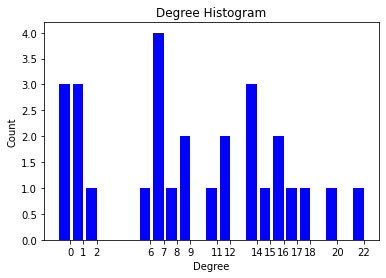

In [17]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)


plt.show()

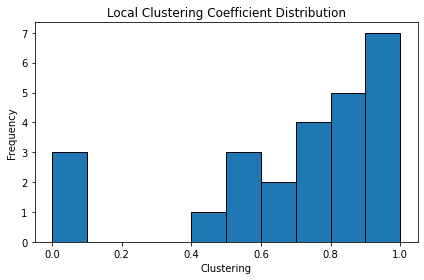

In [18]:
from matplotlib.cm import ScalarMappable

gc = G.subgraph(max(nx.connected_components(G)))
lcc = nx.clustering(gc)

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

ax1.hist(lcc.values(), bins=10, edgecolor = 'black')
ax1.set_xlabel('Clustering')
ax1.set_ylabel('Frequency')

plt.title("Local Clustering Coefficient Distribution")
plt.tight_layout()
plt.show()

Task 8: communities

In [19]:
communities = nx.algorithms.community.label_propagation_communities(G)

In [20]:
print(communities)

dict_values([{'warukraine', 'donetsk', 'specialforces', 'kiev', 'russia', 'donbasswar', 'ukrainewar', 'ukrainianarmy', 'donbass', 'airsoft', 'news', 'soldiers', 'victory', 'lviv', 'azovsea', 'war', 'odessa', 'azov', 'army', 'nato', 'military', 'tactics', 'kyiv', 'ua', 'ukrainenews'}, {'nomockal'}, {'militarystile'}, {'militaryukraine'}])


In [21]:
list_communities = list(communities)
print(len(list_communities))


4


In [23]:
subgraph1 = G.subgraph(list_communities[0])
subgraph2 = G.subgraph(list_communities[1])
subgraph3 = G.subgraph(list_communities[2])
subgraph4 = G.subgraph(list_communities[3])

In [24]:
data_subgraph1 = [['Nodes', subgraph1.number_of_nodes()],
                    ['Edges', subgraph1.number_of_edges()],
                    ['Average degree centrality', statistics.mean([x for x in nx.degree_centrality(subgraph1).values()])],
                    ['Diameter', nx.diameter(subgraph1)],
                    ['Average Clustering Coefficient', nx.average_clustering(subgraph1)]]

data_subgraph2 = [['Nodes', subgraph2.number_of_nodes()],
                    ['Edges', subgraph2.number_of_edges()],
                    ['Average degree centrality', statistics.mean([x for x in nx.degree_centrality(subgraph2).values()])],
                    ['Diameter', nx.diameter(subgraph2)],
                    ['Average Clustering Coefficient', nx.average_clustering(subgraph2)]]

data_subgraph3 = [['Nodes', subgraph3.number_of_nodes()],
                    ['Edges', subgraph3.number_of_edges()],
                    ['Average degree centrality', statistics.mean([x for x in nx.degree_centrality(subgraph3).values()])],
                    ['Diameter', nx.diameter(subgraph3)],
                    ['Average Clustering Coefficient', nx.average_clustering(subgraph3)]]

data_subgraph4 = [['Nodes', subgraph4.number_of_nodes()],
                    ['Edges', subgraph4.number_of_edges()],
                    ['Average degree centrality', statistics.mean([x for x in nx.degree_centrality(subgraph4).values()])],
                    ['Diameter', nx.diameter(subgraph4)],
                    ['Average Clustering Coefficient', nx.average_clustering(subgraph4)]]

In [25]:
print(tabulate(data_subgraph1, headers=['Property Community 1', 'Value'], tablefmt='fancy_grid'))

print(tabulate(data_subgraph2, headers=['Property Community 2', 'Value'], tablefmt='fancy_grid'))

print(tabulate(data_subgraph3, headers=['Property Community 3', 'Value'], tablefmt='fancy_grid'))

print(tabulate(data_subgraph4, headers=['Property Community 4', 'Value'], tablefmt='fancy_grid'))

╒════════════════════════════════╤════════════╕
│ Property Community 1           │      Value │
╞════════════════════════════════╪════════════╡
│ Nodes                          │  25        │
├────────────────────────────────┼────────────┤
│ Edges                          │ 133        │
├────────────────────────────────┼────────────┤
│ Average degree centrality      │   0.443333 │
├────────────────────────────────┼────────────┤
│ Diameter                       │   3        │
├────────────────────────────────┼────────────┤
│ Average Clustering Coefficient │   0.700277 │
╘════════════════════════════════╧════════════╛
╒════════════════════════════════╤═════════╕
│ Property Community 2           │   Value │
╞════════════════════════════════╪═════════╡
│ Nodes                          │       1 │
├────────────────────────────────┼─────────┤
│ Edges                          │       0 │
├────────────────────────────────┼─────────┤
│ Average degree centrality      │       1 │
├───────────────

Task 9: Botometer Analysis

In [334]:
sorted_degree_centrality = {k: v for k, v in sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)}

In [335]:
print(sorted_degree_centrality)

{'russia': 0.8148148148148148, 'ukrainewar': 0.7407407407407407, 'war': 0.6666666666666666, 'nato': 0.6296296296296295, 'military': 0.5925925925925926, 'azov': 0.5925925925925926, 'kyiv': 0.5555555555555556, 'kiev': 0.5185185185185185, 'donetsk': 0.5185185185185185, 'news': 0.5185185185185185, 'donbass': 0.4444444444444444, 'lviv': 0.4444444444444444, 'odessa': 0.4074074074074074, 'army': 0.3333333333333333, 'ukrainenews': 0.3333333333333333, 'soldiers': 0.2962962962962963, 'ua': 0.25925925925925924, 'donbasswar': 0.25925925925925924, 'warukraine': 0.25925925925925924, 'ukrainianarmy': 0.25925925925925924, 'victory': 0.2222222222222222, 'airsoft': 0.07407407407407407, 'specialforces': 0.037037037037037035, 'tactics': 0.037037037037037035, 'azovsea': 0.037037037037037035, 'nomockal': 0.0, 'militarystile': 0.0, 'militaryukraine': 0.0}


In [336]:
rank_10_hashtags = [x for x in sorted_degree_centrality.keys()]
rank_10_hashtags = rank_10_hashtags[:10]

list_of_usernames = {}

for index, row in tweets.iterrows():
    intersection = set([hashtag_tweet.lower() for hashtag_tweet in ast.literal_eval(row.loc['hashtags'])]).intersection(rank_10_hashtags)
    if len(intersection) > 0:
        list_of_usernames[row.loc['username']] = {'hashtag':[x for x in intersection]}


In [337]:
print(f'usernames: {len(list_of_usernames)}')

usernames: 7468


In [338]:
import botometer
import random

rapidapi_key = "6a7c8570f3mshe25c454132d8231p19a690jsnfdc9e513444b"
twitter_app_auth = {
    'consumer_key': 'rI6ajT1sZdu3DD0G92k2cOzpk',
    'consumer_secret': '391VTODkfp8y9PIYOs4CVj4elrdjLk6hKPawQxZWVLiqzBYH99',
    'access_token': '1508709948766699525-kYtl83OTJgaQcwRK6Yl8q4PH3rHfD6',
    'access_token_secret': 'UEpHsWoEbazRLZZ47T39nGDvpSyPQY0lalStqvH10gm5P',
  }

bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

accounts = [key for (key,value) in list_of_usernames.items()]

sample = random.choices(accounts, k=500)
sample_at = [''.join(['@', s]) for s in sample]

results = bom.check_accounts_in(sample_at)


In [339]:
values = []

for username, result in results:
    if 'cap' in result.keys():
        print(result['cap'])
        values.append(statistics.mean([x for x in result['cap'].values()]))

{'english': 0.795728227940139, 'universal': 0.8043181589918191}
{'english': 0.8339181685112829, 'universal': 0.8169336709169681}
{'english': 0.8339181685112829, 'universal': 0.8252572897541253}
{'english': 0.8036706514015852, 'universal': 0.7828265255249504}
{'english': 0.797075908158591, 'universal': 0.5222398722127631}
{'english': 0.8339181685112829, 'universal': 0.7784494983408411}
{'english': 0.8395863545645614, 'universal': 0.7784494983408411}
{'english': 0.3912159239072283, 'universal': 0.31739450135566455}
{'english': 0.2520419704315795, 'universal': 0.3469210182245441}
{'english': 0.7946723107742963, 'universal': 0.799570188835745}
{'english': 0.8339181685112829, 'universal': 0.8053088638387352}
{'english': 0.8524047631581662, 'universal': 0.8068955728616037}
{'english': 0.793087009461318, 'universal': 0.7437205366967014}
{'english': 0.8021481695167405, 'universal': 0.7089830786080018}
{'english': 0.7717813288270262, 'universal': 0.7897432630001835}
{'english': 0.80087991751447

KeyboardInterrupt: 

In [340]:
print(values)

[0.800023193465979, 0.8254259197141255, 0.8295877291327041, 0.7932485884632678, 0.6596578901856771, 0.806183833426062, 0.8090179264527013, 0.35430521263144643, 0.2994814943280618, 0.7971212498050206, 0.8196135161750091, 0.8296501680098849, 0.7684037730790096, 0.7555656240623712, 0.7807622959136049, 0.8061946610362731, 0.2973259847219353, 0.8521375044845312, 0.8895809154136347, 0.8008010258172988, 0.8681276532844251, 0.8122222103971041, 0.7943821396944998, 0.7944937108247232, 0.7739889880880192, 0.7965115871613686, 0.8708272441020828, 0.7830728961031725, 0.7938461645350628, 0.707331315017399, 0.5240791038591167, 0.7794450604169918, 0.8077437967874768, 0.800023193465979, 0.8013425872507264, 0.5711005769520313, 0.8582445726310934, 0.7922342795696193, 0.8248996417652981, 0.8037786907804096, 0.7001432552073217, 0.8333518861973017, 0.6734623991864526, 0.6752007503751876, 0.7342267884390535, 0.7790155118521851, 0.8175882975189954, 0.6600110226898641, 0.8295381804109865, 0.8805447814603882, 0.

In [341]:
print(f'Number of samples {len(values)}')

Number of samples 305


In [342]:
rounded_values = [round(num) for num in values]
print(rounded_values)

[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [343]:
print(f'Bots: {rounded_values.count(1)}')
print(f'No Bots: {rounded_values.count(0)}')

Bots: 285
No Bots: 20


In [344]:
for i, value in enumerate(rounded_values):
    list_of_usernames[sample[i]]['bot'] = value

In [345]:
print(list_of_usernames)

{'worldbankdata': {'hashtag': ['russia']}, 'VanguardMag': {'hashtag': ['military']}, 'ReviewingNews': {'hashtag': ['news']}, 'JPeterUNI': {'hashtag': ['news']}, 'KozysKorner': {'hashtag': ['kyiv']}, 'stratorob': {'hashtag': ['news']}, 'vivalabonbon': {'hashtag': ['war']}, 'AcousticWorshi7': {'hashtag': ['news']}, 'United_Radio': {'hashtag': ['news']}, 'LottoCluesCom': {'hashtag': ['russia']}, 'KyleWin16520692': {'hashtag': ['nato']}, 'TWMCLtd': {'hashtag': ['azov']}, 'CryptoETC7': {'hashtag': ['ukrainewar']}, 'noYOUhush': {'hashtag': ['russia']}, 'techinjektion': {'hashtag': ['news']}, 'Legaartis': {'hashtag': ['war']}, 'GossipAddictUS': {'hashtag': ['news']}, 'Emergenza24': {'hashtag': ['russia']}, 'skunkradiolive': {'hashtag': ['news']}, 'JJWvanWaning': {'hashtag': ['nato', 'russia']}, 'Koltris2': {'hashtag': ['nato']}, 'CDHKedition': {'hashtag': ['russia']}, 'Grumpy__Skipper': {'hashtag': ['russia']}, 'poandpo': {'hashtag': ['news']}, 'kalique36411019': {'hashtag': ['military']}, '4

In [355]:
russia_count = 0
news_count = 0

for key in list_of_usernames.keys():
    if 'russia' in list_of_usernames[key]['hashtag']:
        russia_count += 1
    if 'news' in list_of_usernames[key]['hashtag']:
        news_count += 1

print(f'count users hashtag russia: {russia_count}')
print(f'count users hashtag news: {news_count}')

count users hashtag russia: 2472
count users hashtag news: 2398


In [346]:
hashtag_bot = { i : [] for i in hashtags }

for s in sample:
    for h in list_of_usernames[s]['hashtag']:
        if 'bot' in list_of_usernames[s]:
            hashtag_bot[h].append(list_of_usernames[s]['bot'])

print(hashtag_bot)

{'ukrainewar': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'war': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], 'army': [], 'military': [1, 1, 1, 1, 1, 1, 1, 1, 1], 'kiev': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], 'ua': [], 'specialforces': [], 'donbass': [], 'donbasswar': [], 'airsoft': [], 'nomockal': [], 'warukraine': [], 'tactics': [], 'azovsea': [], 'militarystile': [], 'azov': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'russia': [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'donetsk': [1], 'soldiers': [], 'ukrainenews': [], 'odessa': [], 'ukrainianarmy': [], 'lviv': [], 'victory': [], 'nato': [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [347]:
hashtag_bot_dict = { i : {} for i in hashtags }

for key in hashtag_bot.keys():
    hashtag_bot_dict[key]['bot'] = hashtag_bot[key].count(1)
    hashtag_bot_dict[key]['no_bot'] = hashtag_bot[key].count(0)

print(hashtag_bot_dict)

{'ukrainewar': {'bot': 22, 'no_bot': 0}, 'war': {'bot': 17, 'no_bot': 1}, 'army': {'bot': 0, 'no_bot': 0}, 'military': {'bot': 9, 'no_bot': 0}, 'kiev': {'bot': 18, 'no_bot': 2}, 'ua': {'bot': 0, 'no_bot': 0}, 'specialforces': {'bot': 0, 'no_bot': 0}, 'donbass': {'bot': 0, 'no_bot': 0}, 'donbasswar': {'bot': 0, 'no_bot': 0}, 'airsoft': {'bot': 0, 'no_bot': 0}, 'nomockal': {'bot': 0, 'no_bot': 0}, 'warukraine': {'bot': 0, 'no_bot': 0}, 'tactics': {'bot': 0, 'no_bot': 0}, 'azovsea': {'bot': 0, 'no_bot': 0}, 'militarystile': {'bot': 0, 'no_bot': 0}, 'azov': {'bot': 18, 'no_bot': 1}, 'russia': {'bot': 99, 'no_bot': 9}, 'donetsk': {'bot': 1, 'no_bot': 0}, 'soldiers': {'bot': 0, 'no_bot': 0}, 'ukrainenews': {'bot': 0, 'no_bot': 0}, 'odessa': {'bot': 0, 'no_bot': 0}, 'ukrainianarmy': {'bot': 0, 'no_bot': 0}, 'lviv': {'bot': 0, 'no_bot': 0}, 'victory': {'bot': 0, 'no_bot': 0}, 'nato': {'bot': 35, 'no_bot': 2}, 'kyiv': {'bot': 10, 'no_bot': 3}, 'militaryukraine': {'bot': 0, 'no_bot': 0}, 'news':

In [348]:
hashtag_bot_dict_short = {key: value for key, value in hashtag_bot_dict.items() if hashtag_bot_dict[key]['bot'] > 0 or hashtag_bot_dict[key]['no_bot'] > 0}
print(hashtag_bot_dict_short)

{'ukrainewar': {'bot': 22, 'no_bot': 0}, 'war': {'bot': 17, 'no_bot': 1}, 'military': {'bot': 9, 'no_bot': 0}, 'kiev': {'bot': 18, 'no_bot': 2}, 'azov': {'bot': 18, 'no_bot': 1}, 'russia': {'bot': 99, 'no_bot': 9}, 'donetsk': {'bot': 1, 'no_bot': 0}, 'nato': {'bot': 35, 'no_bot': 2}, 'kyiv': {'bot': 10, 'no_bot': 3}, 'news': {'bot': 96, 'no_bot': 2}}


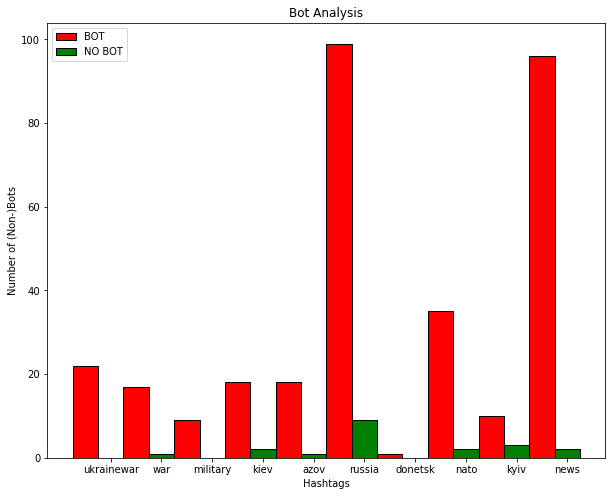

In [349]:
import matplotlib.pyplot as plt
import numpy as np
  
# set width of bar
barWidth = 0.5
fig = plt.subplots(figsize =(10, 8))
 
# set height of bar
x = hashtag_bot_dict_short.keys()
BOT = [x['bot'] for x in hashtag_bot_dict_short.values()]
NO_BOT = [x['no_bot'] for x in hashtag_bot_dict_short.values()]
 
# Set position of bar on X axis
br1 = np.arange(len(BOT))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, BOT, color ='r', width = barWidth,
        edgecolor ='black', label ='BOT')
plt.bar(br2, NO_BOT, color ='g', width = barWidth,
        edgecolor ='black', label ='NO BOT')
 
# Adding Xticks
plt.title('Bot Analysis')
plt.xlabel('Hashtags')
plt.ylabel('Number of (Non-)Bots')
plt.xticks([r + barWidth for r in range(len(BOT))],
        [key for key in hashtag_bot_dict_short.keys()])
 
plt.legend()
plt.show()


Task 10: Support

In [350]:
import math

dictOfhashtags_support = { i : {'retweets': 0, 'replies': 0} for i in hashtags }
temp_list_of_matches = []

for index, row in tweets.iterrows():
    row.loc['hashtags']
    list_of_matches = list(set([hashtag_tweet.lower() for hashtag_tweet in ast.literal_eval(row.loc['hashtags'])]).intersection(hashtags))
    for tag in list_of_matches:
        dictOfhashtags_support[tag]['retweets'] += int(row.loc['retweet_count'])
        if not math.isnan(row.loc['replies']):
            dictOfhashtags_support[tag]['replies'] += 1

In [351]:
print(dictOfhashtags_support)

{'ukrainewar': {'retweets': 1003, 'replies': 61}, 'war': {'retweets': 3239, 'replies': 103}, 'army': {'retweets': 1042, 'replies': 84}, 'military': {'retweets': 237, 'replies': 6}, 'kiev': {'retweets': 1144, 'replies': 62}, 'ua': {'retweets': 15, 'replies': 9}, 'specialforces': {'retweets': 7, 'replies': 0}, 'donbass': {'retweets': 537, 'replies': 68}, 'donbasswar': {'retweets': 0, 'replies': 1}, 'airsoft': {'retweets': 23, 'replies': 1}, 'nomockal': {'retweets': 0, 'replies': 0}, 'warukraine': {'retweets': 12, 'replies': 0}, 'tactics': {'retweets': 25, 'replies': 4}, 'azovsea': {'retweets': 0, 'replies': 1}, 'militarystile': {'retweets': 0, 'replies': 0}, 'azov': {'retweets': 5962, 'replies': 220}, 'russia': {'retweets': 11603, 'replies': 794}, 'donetsk': {'retweets': 91, 'replies': 18}, 'soldiers': {'retweets': 18, 'replies': 1}, 'ukrainenews': {'retweets': 26, 'replies': 1}, 'odessa': {'retweets': 634, 'replies': 37}, 'ukrainianarmy': {'retweets': 164, 'replies': 4}, 'lviv': {'retwe

In [357]:
for key in dictOfhashtags_support.keys():
    dictOfhashtags_support[key]['tweet_count'] = 0

for index, row in tweets.iterrows():
    for hashtag in ast.literal_eval(row.loc['hashtags']):
        if hashtag.lower() in dictOfhashtags_support:
            dictOfhashtags_support[hashtag.lower()]['tweet_count'] += 1

In [358]:
print(dictOfhashtags_support)

{'ukrainewar': {'retweets': 1003, 'replies': 61, 'tweet_count': 871}, 'war': {'retweets': 3239, 'replies': 103, 'tweet_count': 881}, 'army': {'retweets': 1042, 'replies': 84, 'tweet_count': 637}, 'military': {'retweets': 237, 'replies': 6, 'tweet_count': 267}, 'kiev': {'retweets': 1144, 'replies': 62, 'tweet_count': 592}, 'ua': {'retweets': 15, 'replies': 9, 'tweet_count': 98}, 'specialforces': {'retweets': 7, 'replies': 0, 'tweet_count': 5}, 'donbass': {'retweets': 537, 'replies': 68, 'tweet_count': 335}, 'donbasswar': {'retweets': 0, 'replies': 1, 'tweet_count': 6}, 'airsoft': {'retweets': 23, 'replies': 1, 'tweet_count': 45}, 'nomockal': {'retweets': 0, 'replies': 0, 'tweet_count': 0}, 'warukraine': {'retweets': 12, 'replies': 0, 'tweet_count': 27}, 'tactics': {'retweets': 25, 'replies': 4, 'tweet_count': 13}, 'azovsea': {'retweets': 0, 'replies': 1, 'tweet_count': 1}, 'militarystile': {'retweets': 0, 'replies': 0, 'tweet_count': 0}, 'azov': {'retweets': 5962, 'replies': 220, 'tweet

In [366]:
for key in dictOfhashtags_support.keys():
    dictOfhashtags_support[key]['ratio'] = 0
    if dictOfhashtags_support[key]['tweet_count'] > 0:
        dictOfhashtags_support[key]['ratio'] = dictOfhashtags_support[key]['retweets'] / dictOfhashtags_support[key]['tweet_count']

In [371]:
print(dictOfhashtags_support)

{'ukrainewar': {'retweets': 1003, 'replies': 61, 'tweet_count': 871, 'ratio': 1.1515499425947187}, 'war': {'retweets': 3239, 'replies': 103, 'tweet_count': 881, 'ratio': 3.6765039727582294}, 'army': {'retweets': 1042, 'replies': 84, 'tweet_count': 637, 'ratio': 1.6357927786499216}, 'military': {'retweets': 237, 'replies': 6, 'tweet_count': 267, 'ratio': 0.8876404494382022}, 'kiev': {'retweets': 1144, 'replies': 62, 'tweet_count': 592, 'ratio': 1.9324324324324325}, 'ua': {'retweets': 15, 'replies': 9, 'tweet_count': 98, 'ratio': 0.15306122448979592}, 'specialforces': {'retweets': 7, 'replies': 0, 'tweet_count': 5, 'ratio': 1.4}, 'donbass': {'retweets': 537, 'replies': 68, 'tweet_count': 335, 'ratio': 1.6029850746268657}, 'donbasswar': {'retweets': 0, 'replies': 1, 'tweet_count': 6, 'ratio': 0.0}, 'airsoft': {'retweets': 23, 'replies': 1, 'tweet_count': 45, 'ratio': 0.5111111111111111}, 'nomockal': {'retweets': 0, 'replies': 0, 'tweet_count': 0, 'ratio': 0}, 'warukraine': {'retweets': 12

In [375]:
ratio_dict = { i : 0 for i in hashtags }

for key in dictOfhashtags_support.keys():
    ratio_dict[key] = dictOfhashtags_support[key]['ratio']

print({k: v for k, v in sorted(ratio_dict.items(), key=lambda item: item[1])})

{'donbasswar': 0.0, 'nomockal': 0, 'azovsea': 0.0, 'militarystile': 0, 'militaryukraine': 0, 'ua': 0.15306122448979592, 'ukrainenews': 0.40625, 'victory': 0.41935483870967744, 'warukraine': 0.4444444444444444, 'airsoft': 0.5111111111111111, 'news': 0.5980831336597562, 'soldiers': 0.72, 'donetsk': 0.7711864406779662, 'military': 0.8876404494382022, 'lviv': 0.9438202247191011, 'ukrainewar': 1.1515499425947187, 'specialforces': 1.4, 'nato': 1.4064594759293114, 'donbass': 1.6029850746268657, 'army': 1.6357927786499216, 'tactics': 1.9230769230769231, 'kiev': 1.9324324324324325, 'odessa': 2.1346801346801345, 'russia': 2.356417546709992, 'ukrainianarmy': 3.1538461538461537, 'war': 3.6765039727582294, 'azov': 7.244228432563791, 'kyiv': 10.029885057471265}
